# Data list

Source: https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=form

- [x] [reanalysis](#reanalysis)
- [x] [ensemble](#ensemble)

# Import

In [3]:
import cdsapi
import zipfile
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import glob
import tarfile
import calendar
import time
c = cdsapi.Client()

## Testing

1 variable, 24 hour. product: ensemble mean, ensemble_spread, reanalysis

In [5]:
c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'format': 'netcdf',
        'variable': '2m_temperature',
        'time': [
            '00:00', '01:00', '02:00',
            '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00',
            '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00',
            '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00',
            '21:00', '22:00', '23:00',
        ],
        'day': '01',
        'month': '01',
        'year': '2018',
    },
    'download.nc')

2023-11-15 17:57:02,357 INFO Welcome to the CDS
2023-11-15 17:57:02,358 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-11-15 17:57:02,515 INFO Request is queued
2023-11-15 17:59:54,009 INFO Request is completed
2023-11-15 17:59:54,014 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data5/adaptor.mars.internal-1700067580.8028495-19678-6-f2f5aa0a-cec1-4941-8c4c-c601dee9ce69.nc to download.nc (47.5M)
2023-11-15 17:59:55,857 INFO Download rate 25.8M/s                                                                     


Result(content_length=49845332,content_type=application/x-netcdf,location=https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data5/adaptor.mars.internal-1700067580.8028495-19678-6-f2f5aa0a-cec1-4941-8c4c-c601dee9ce69.nc)

In [6]:
c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'ensemble_mean',
        'format': 'netcdf',
        'variable': '2m_temperature',
        'time': [
            '00:00', '01:00', '02:00',
            '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00',
            '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00',
            '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00',
            '21:00', '22:00', '23:00',
        ],
        'day': '01',
        'month': '01',
        'year': '2018',
    },
    'ensemble_mean.nc')

2023-11-15 17:59:55,919 INFO Welcome to the CDS
2023-11-15 17:59:55,919 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-11-15 17:59:55,975 INFO Request is queued
2023-11-15 18:08:14,533 INFO Request is completed
2023-11-15 18:08:14,534 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data8/adaptor.mars.internal-1700067990.2083764-27584-12-180f0a08-dc56-4e69-8b85-33a2f3808b26.nc to ensemble_mean.nc (4M)
2023-11-15 18:08:14,988 INFO Download rate 8.8M/s                                                                      


Result(content_length=4164148,content_type=application/x-netcdf,location=https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data8/adaptor.mars.internal-1700067990.2083764-27584-12-180f0a08-dc56-4e69-8b85-33a2f3808b26.nc)

In [11]:
ds=xr.open_dataset('7variables.nc')
ds

<xarray.Dataset>
Dimensions:    (longitude: 361, latitude: 321, time: 24)
Coordinates:
  * longitude  (longitude) float32 -30.0 -29.75 -29.5 -29.25 ... 59.5 59.75 60.0
  * latitude   (latitude) float32 40.0 39.75 39.5 39.25 ... -39.5 -39.75 -40.0
  * time       (time) datetime64[ns] 2018-01-01 ... 2018-01-01T23:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    d2m        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    msl        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
    ssrdc      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-11-15 17:33:08 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

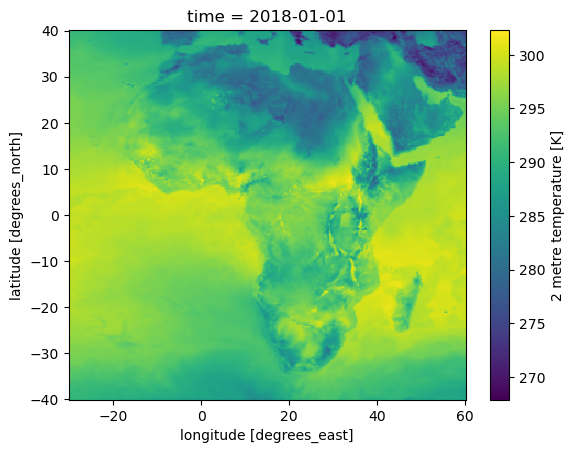

In [12]:
ds.t2m[0].plot()

In [13]:
ds1=xr.open_dataset('ensemble_mean.nc')
ds1

<xarray.Dataset>
Dimensions:    (longitude: 720, latitude: 361, time: 8)
Coordinates:
  * longitude  (longitude) float32 0.0 0.5 1.0 1.5 ... 358.0 358.5 359.0 359.5
  * latitude   (latitude) float32 90.0 89.5 89.0 88.5 ... -89.0 -89.5 -90.0
  * time       (time) datetime64[ns] 2018-01-01 ... 2018-01-01T21:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-11-15 17:06:30 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

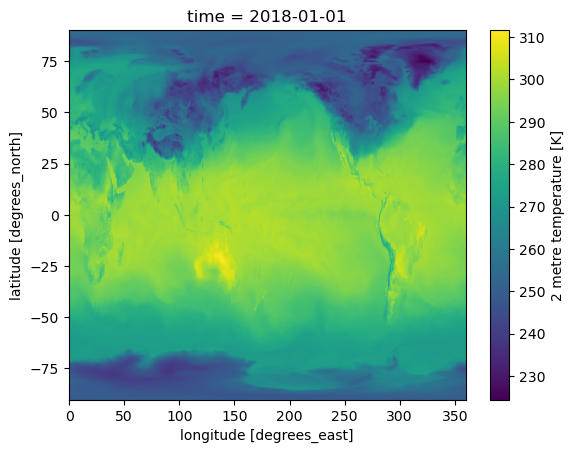

In [14]:
ds1.t2m[0].plot()

In [10]:
c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'format': 'netcdf',
        'variable': [
            '10m_u_component_of_wind', '10m_v_component_of_wind', '2m_dewpoint_temperature',
            '2m_temperature', 'mean_sea_level_pressure', 'surface_pressure',
            'surface_solar_radiation_downward_clear_sky',
        ],
        'time': [
            '00:00', '01:00', '02:00',
            '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00',
            '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00',
            '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00',
            '21:00', '22:00', '23:00',
        ],
        'day': '01',
        'month': '01',
        'year': '2018',
        'area': [
            40, -30, -40,
            60,
        ],
    },
    '7variables.nc')

2023-11-15 18:32:03,155 INFO Welcome to the CDS
2023-11-15 18:32:03,155 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-11-15 18:32:03,225 INFO Request is queued
2023-11-15 18:33:18,573 INFO Request is completed
2023-11-15 18:33:18,574 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data8/adaptor.mars.internal-1700069587.7419918-31662-7-2778e5bc-983c-49c7-9349-faf4f4389f95.nc to 7variables.nc (37.1M)
2023-11-15 18:33:19,729 INFO Download rate 32.2M/s                                                                     


Result(content_length=38941524,content_type=application/x-netcdf,location=https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data8/adaptor.mars.internal-1700069587.7419918-31662-7-2778e5bc-983c-49c7-9349-faf4f4389f95.nc)

# reanalysis

'10m_u_component_of_wind', '10m_v_component_of_wind', '2m_dewpoint_temperature',
            '2m_temperature', 'mean_sea_level_pressure', 'surface_pressure',
            'surface_solar_radiation_downward_clear_sky'

In [4]:
folder=r'E:\WaPORQA\ERA5'
start='2018-01-01'
end='2022-12-31'
bbox=[40, -30, -40, 60,]
# variables=[
#             '10m_u_component_of_wind', '10m_v_component_of_wind', '2m_dewpoint_temperature',
#             '2m_temperature', 'mean_sea_level_pressure', 'surface_pressure',
#             'surface_solar_radiation_downward_clear_sky',
#         ]
variables=['surface_solar_radiation_downwards']
dates=pd.date_range(start,end,freq='D')
for date in dates:
    filename=np.datetime_as_string(np.datetime64(date),unit='D')+'ssrd.nc'
    filepath=os.path.join(folder,filename)
    if not os.path.exists(filepath):
        c.retrieve(
            'reanalysis-era5-single-levels',
            {
                'product_type': 'reanalysis',
                'format': 'netcdf',
                'variable': variables,
                'time': [
                    '00:00', '01:00', '02:00',
                    '03:00', '04:00', '05:00',
                    '06:00', '07:00', '08:00',
                    '09:00', '10:00', '11:00',
                    '12:00', '13:00', '14:00',
                    '15:00', '16:00', '17:00',
                    '18:00', '19:00', '20:00',
                    '21:00', '22:00', '23:00',
                ],
                'day': '%02d'%date.day,
                'month': '%02d'%date.month,
                'year': str(date.year),
                'area': bbox,
            },
            filepath)

2023-11-27 09:32:52,368 INFO Welcome to the CDS
2023-11-27 09:32:52,369 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-11-27 09:32:52,627 INFO Request is queued
2023-11-27 10:01:13,454 INFO Request is completed
2023-11-27 10:01:13,456 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data4/adaptor.mars.internal-1701075617.5430548-13804-8-d45d337b-89c4-4993-9ee5-2013ced8687d.nc to E:\WaPORQA\ERA5\2018-01-01ssrd.nc (5.3M)
2023-11-27 10:01:14,966 INFO Download rate 3.5M/s                                                                      
2023-11-27 10:01:15,052 INFO Welcome to the CDS
2023-11-27 10:01:15,058 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-11-27 10:01:15,312 INFO Request is queued


KeyboardInterrupt: 

## Download in parallel

In [2]:
import concurrent.futures
import cdsapi
import zipfile
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import glob
import tarfile
import calendar
import time
c = cdsapi.Client()
# Generate a list of items (replace with your actual list)
start='2019-09-26'
end='2022-12-31'
dates=pd.date_range(start,end,freq='D')


In [ ]:
# Number of parallel processes
parallel_processes = 11

# Number of items per process
items_per_process = 111

#max item index
imax=len(dates)-1

# Replace this function with your actual download logic
def download_file(date):
    folder=r'E:\WaPORQA\ERA5'
    bbox=[40, -30, -40, 60,]
    variables=[
                '10m_u_component_of_wind', '10m_v_component_of_wind', '2m_dewpoint_temperature',
                '2m_temperature', 'mean_sea_level_pressure', 'surface_pressure',
                'surface_solar_radiation_downward_clear_sky',
            ]
    ###
    filename=np.datetime_as_string(np.datetime64(date),unit='D')+'.nc'
    filepath=os.path.join(folder,filename)
    if not os.path.exists(filepath):
        c.retrieve(
            'reanalysis-era5-single-levels',
            {
                'product_type': 'reanalysis',
                'format': 'netcdf',
                'variable': variables,
                'time': [
                    '00:00', '01:00', '02:00',
                    '03:00', '04:00', '05:00',
                    '06:00', '07:00', '08:00',
                    '09:00', '10:00', '11:00',
                    '12:00', '13:00', '14:00',
                    '15:00', '16:00', '17:00',
                    '18:00', '19:00', '20:00',
                    '21:00', '22:00', '23:00',
                ],
                'day': '%02d'%date.day,
                'month': '%02d'%date.month,
                'year': str(date.year),
                'area': bbox,
            },
            filepath)
    return f"Downloaded file {filename}"


# Function to download items in parallel
def download_in_parallel(start_index):
    with concurrent.futures.ThreadPoolExecutor() as executor:
        end_index = min(start_index + items_per_process,imax)
        items_to_download = dates[start_index:end_index]
        results = list(executor.map(download_file, items_to_download))
    return results

# Create a list of start indices for each parallel process
start_indices = [i * items_per_process for i in range(parallel_processes)]

# Use ProcessPoolExecutor to run the download in parallel
# with concurrent.futures.ProcessPoolExecutor() as executor: # For linux
with concurrent.futures.ThreadPoolExecutor() as executor: # For window
    all_results = list(executor.map(download_in_parallel, start_indices))

# Flatten the results list
flat_results = [result for sublist in all_results for result in sublist]

# Print the results
for result in flat_results:
    print(result)

2023-11-16 18:39:00,107 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-11-16 18:39:00,111 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-11-16 18:39:00,111 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-11-16 18:39:00,112 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-11-16 18:39:00,112 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-11-16 18:39:00,127 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-11-16 18:39:00,128 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-11-16 18:39:00,129 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resource

# ensemble

In [2]:
folder=r'E:\WaPORQA\ERA5\Ensemble'
start= '2021-05-23'
end='2022-06-15'
bbox=[40, -30, -40, 60,]
# variables=[
#             '10m_u_component_of_wind', '10m_v_component_of_wind', '2m_dewpoint_temperature',
#             '2m_temperature', 'mean_sea_level_pressure', 'surface_pressure',
#             'surface_solar_radiation_downward_clear_sky',
#         ]
variables=[
            'surface_solar_radiation_downwards',
        ]
dates=pd.date_range(start,end,freq='D')
for date in dates:
    filename='ensemble_mean_'+np.datetime_as_string(np.datetime64(date),unit='D')+'ssrd.nc'
    filepath=os.path.join(folder,filename)
    if not os.path.exists(filepath):
        c.retrieve(
            'reanalysis-era5-single-levels',
            {
                'product_type': 'ensemble_mean',
                'format': 'netcdf',
                'variable': variables,
                'time': [
                    '00:00', '01:00', '02:00',
                    '03:00', '04:00', '05:00',
                    '06:00', '07:00', '08:00',
                    '09:00', '10:00', '11:00',
                    '12:00', '13:00', '14:00',
                    '15:00', '16:00', '17:00',
                    '18:00', '19:00', '20:00',
                    '21:00', '22:00', '23:00',
                ],
                'day': '%02d'%date.day,
                'month': '%02d'%date.month,
                'year': str(date.year),
                'area': bbox,
            },
            filepath)

2024-07-16 00:19:20,470 INFO Welcome to the CDS
2024-07-16 00:19:20,472 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-16 00:19:20,656 INFO Request is completed
2024-07-16 00:19:20,656 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data3/adaptor.mars.internal-1721072294.0574374-19106-2-18e542b9-c528-441d-9d26-8fb5d4ef1551.nc to E:\WaPORQA\ERA5\Ensemble\ensemble_mean_2021-06-05ssrd.nc (457.8K)
2024-07-16 00:19:22,075 INFO Download rate 322.6K/s                                                                    
2024-07-16 00:19:22,149 INFO Welcome to the CDS
2024-07-16 00:19:22,150 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-07-16 00:19:22,236 INFO Request is queued
2024-07-16 00:19:23,272 INFO Request is running
2024-07-16 00:19:24,922 INFO Request is completed
2024-07-16 00:19:24,922 INFO Downloading https://do

In [4]:
folder=r'E:\WaPORQA\ERA5\Ensemble'
start='2022-08-15'
end='2022-12-31'
bbox=[40, -30, -40, 60,]
# variables=[
#             '10m_u_component_of_wind', '10m_v_component_of_wind', '2m_dewpoint_temperature',
#             '2m_temperature', 'mean_sea_level_pressure', 'surface_pressure',
#             'surface_solar_radiation_downward_clear_sky',
#         ]
variables=[
            'surface_solar_radiation_downwards',
        ]
dates=pd.date_range(start,end,freq='D')
for date in dates:
    filename='ensemble_spread_'+np.datetime_as_string(np.datetime64(date),unit='D')+'ssrd.nc'
    filepath=os.path.join(folder,filename)
    if not os.path.exists(filepath):
        c.retrieve(
            'reanalysis-era5-single-levels',
            {
                'product_type': 'ensemble_spread',
                'format': 'netcdf',
                'variable': variables,
                'time': [
                    '00:00', '01:00', '02:00',
                    '03:00', '04:00', '05:00',
                    '06:00', '07:00', '08:00',
                    '09:00', '10:00', '11:00',
                    '12:00', '13:00', '14:00',
                    '15:00', '16:00', '17:00',
                    '18:00', '19:00', '20:00',
                    '21:00', '22:00', '23:00',
                ],
                'day': '%02d'%date.day,
                'month': '%02d'%date.month,
                'year': str(date.year),
                'area': bbox,
            },
            filepath)